# Assignment on Classification

In [64]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#importing dataset
data=pd.read_excel(r'C:\Users\induj\Downloads\iris.xls')

In [66]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic details of the dataset

In [68]:
data.shape

(150, 5)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [71]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
# finding missing values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [73]:
data.SL.nunique()

35

In [74]:
data.SW.nunique()

23

In [75]:
data.PL.nunique()

43

In [76]:
data.PW.nunique()

22

In [77]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

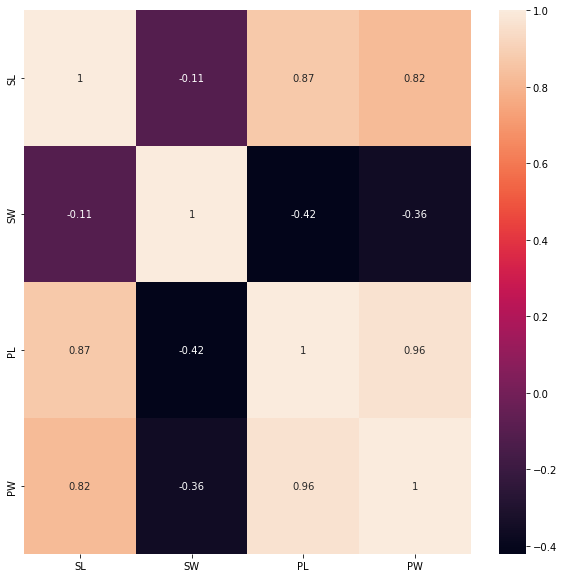

In [78]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Label Encoder

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [80]:
 data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [83]:
X=data.drop(columns=['Classification'])
y=data['Classification']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [86]:
logistic_model=model.fit(X_train,y_train)
y_pred_logit=logistic_model.predict(X_test)

In [87]:
y_pred_logit

array([1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0,
       2])

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test,y_pred_logit)

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 15]], dtype=int64)

In [90]:
from sklearn.metrics import precision_score, accuracy_score

In [91]:
accuracy_score(y_test,y_pred_logit)

0.9777777777777777

# kNN Model

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
model=KNeighborsClassifier()

In [94]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
#print metrics to get performance
model.score(X_test,y_test)

0.9333333333333333